Question 1

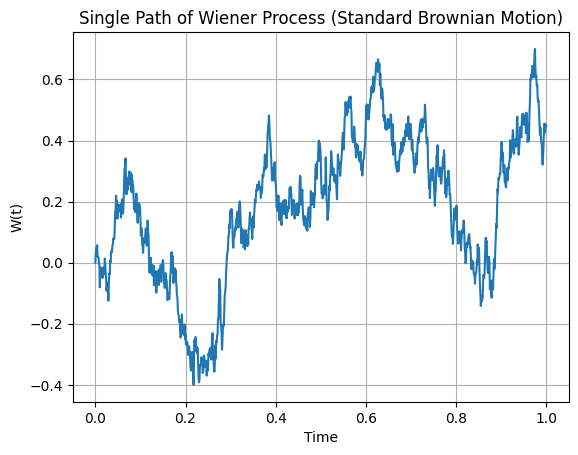

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
T=1.0
N=1000
dt=T/N   #Time increment per step
t=np.linspace(0,T,N+1) #Time points from 0 to T
W=np.zeros(N+1)
W[1:]=np.cumsum(np.sqrt(dt)*np.random.randn(N))  # Generate Brownian path by taking cumulative sum of all the increments.
plt.plot(t, W)
plt.title("Single Path of Wiener Process (Standard Brownian Motion)")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

Question 2

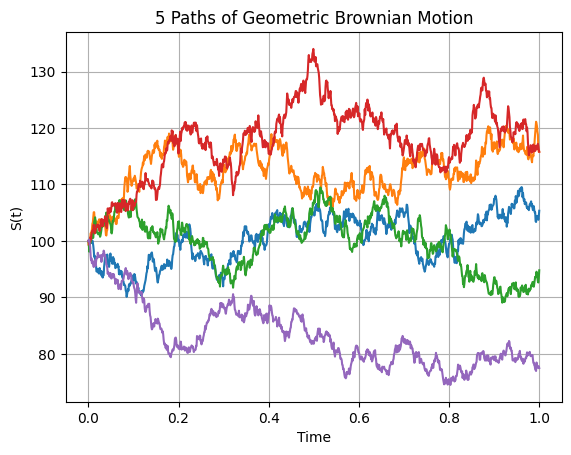

In [ ]:
S0=100
alpha=0.1    # Drift coefficient
sigma=0.2    # Volatility
T=1.0        # Time horizon
N=1000       # Number of time steps
dt=T/N     # Time increment
t=np.linspace(0, T, N+1)  # Time grid

# Plotting 5 GBM paths
plt.figure()
for _ in range(5):
    W = np.zeros(N+1)
    W[1:] = np.cumsum(np.sqrt(dt)*np.random.randn(N))  # Brownian path
    S = S0 * np.exp(sigma * W + (alpha - 0.5 * sigma**2) * t)  # GBM formula
    plt.plot(t, S)

plt.title("5 Paths of Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()

Question 3

In [ ]:
N =100000  #number of simulations
s=1.0
t=2.0
if t<s:
    s,t=t,s  #ensure s <= t
W_s=np.random.normal(0, np.sqrt(s), N)
W_t=W_s+np.random.normal(0,np.sqrt(t - s),N)  # W_t = W_s + (W_t - W_s)

# Estimate E[W_s * W_t]
E_Ws_Wt = np.mean(W_s*W_t)
print(f"Estimated E[W_s W_t]:{E_Ws_Wt:.4f}")
print(f"Theoretical min(s, t):{min(s, t):.4f}")

Estimated E[W_s W_t]:0.9990
Theoretical min(s, t):1.0000


Question 4

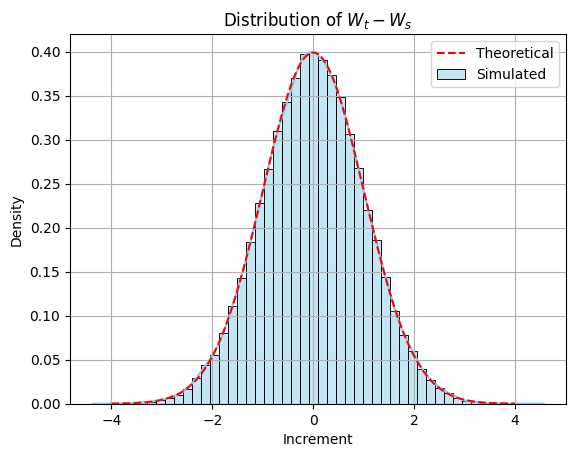

In [ ]:
import seaborn as sns
np.random.seed(42)
N=100000  # number of sample paths
s=1.0
t=2.0
delta=t-s

#Simulate W_s and W_t using Brownian motion properties
W_s=np.random.normal(0,np.sqrt(s),N)
W_t=W_s+np.random.normal(0,np.sqrt(t-s),N)

#Increment W_t-W_s
increment=W_t-W_s

#Plot histogram of increments
plt.figure()
sns.histplot(increment,kde=True,stat="density",bins=50,color="skyblue",label='Simulated')

#Theoretical normal density
x = np.linspace(-4*np.sqrt(delta), 4*np.sqrt(delta), 200)
plt.plot(x, 1/np.sqrt(2*np.pi*delta)*np.exp(-x**2/(2*delta)),'r--',label='Theoretical')

plt.title(f"Distribution of $W_t - W_s$")
plt.xlabel("Increment")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


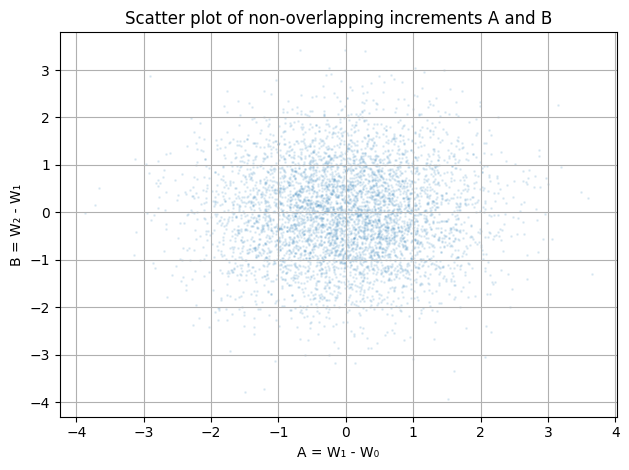

Sample correlation between A and B: -0.0064


In [ ]:
W0 = np.zeros(N)
W1 = np.random.normal(0, np.sqrt(1), N)  # W1 - W0
W2 = W1 + np.random.normal(0, np.sqrt(1), N)  # W2 = W1 + (W2 - W1)

# Increments over non-overlapping intervals
A=W1-W0
B=W2-W1

# Scatter plot of A vs B
plt.figure()
plt.scatter(A[:5000], B[:5000], alpha=0.1, s=1)
plt.title("Scatter plot of non-overlapping increments A and B")
plt.xlabel("A = W₁ - W₀")
plt.ylabel("B = W₂ - W₁")
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute sample correlation
correlation = np.corrcoef(A, B)[0, 1]
print(f"Sample correlation between A and B: {correlation:.4f}")

Question 5

In [ ]:
np.random.seed(0)
N = 100000
s = 1.0
t = 2.0

# Step 1: Simulate W_s~N(0,sqrt(s))
W_s = np.random.normal(0, np.sqrt(s), N)

# Step 2: Simulate increment~N(0,sqrt(t - s))
increments = np.random.normal(0, np.sqrt(t - s), N)

# Step 3: Construct W_t = W_s+increment
W_t = W_s + increments

# Step 4: Verify that E[W_t - W_s] ≈ 0
diff = W_t - W_s
print(f"Sample mean of W_t - W_s: {np.mean(diff):.5f}, should be ≈ 0 if E[W_t | F_s] = W_s")
# Optional: Check that E[W_t] ≈ E[W_s]
print(f"Mean of W_s: {np.mean(W_s):.5f}")
print(f"Mean of W_t: {np.mean(W_t):.5f}")


Sample mean of W_t - W_s: 0.00509, should be ≈ 0 if E[W_t | F_s] = W_s
Mean of W_s: 0.00158
Mean of W_t: 0.00667
